In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:
IBM = wb.DataReader('IBM',data_source='yahoo', start='2007-12-31', end='2009-12-31') # historical stock price fetching

In [3]:
IBM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,105.162521,102.543022,104.694077,103.346077,5995986.0,66.319588
2008-01-02,104.196938,99.588913,104.196938,100.086044,9940661.0,64.227562
2008-01-03,100.927345,99.407265,100.219887,100.286804,7875229.0,64.356392
2008-01-04,99.378586,96.061188,99.378586,96.682602,11542192.0,62.043484
2008-01-07,96.558319,94.674950,95.841301,95.650093,13232318.0,61.380890


In [4]:
# Bollinger Bands:
# 20 day simple moving average (SMA) line.
# Upper Band = SMA + 2 * 20 day standard deviation.
# Lower Band = SMA - 2 * 20 day standard deviation.

In [5]:
# Calculate SMA,upper band and lower band

In [6]:
IBM ['Px']= IBM ['Adj Close']

In [7]:
n = 20
m = 2

In [8]:
IBM['SMA'] = pd.Series((IBM['Px'].rolling(n, min_periods=n).mean()), name = 'SMA')
sigma = IBM['Px'].rolling(n, min_periods=n).std()

In [9]:
IBM['BU'] = pd.Series((IBM['SMA'] + m * sigma), name = 'BU') # Upper Bands
IBM['BL'] = pd.Series((IBM['SMA'] - m * sigma), name = 'BU') # Lower Bands

In [10]:
# Plot Price

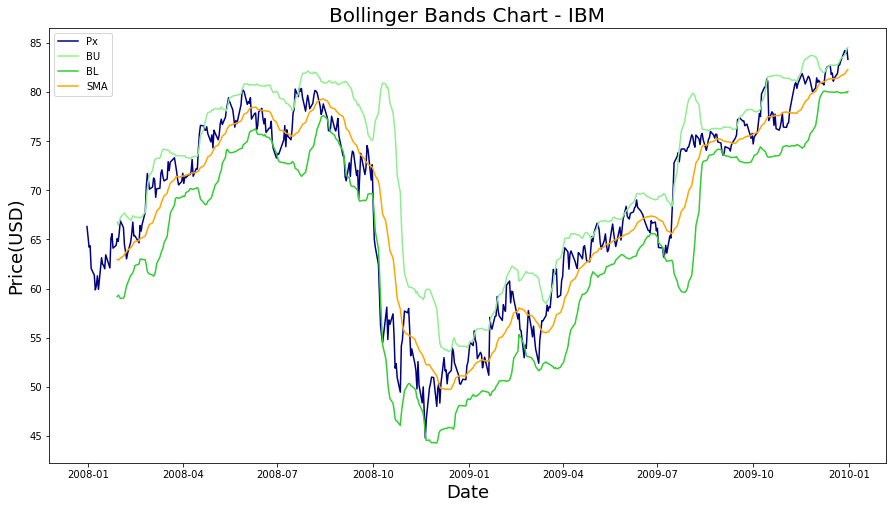

In [11]:
plt.figure(figsize =(15,8))
plt.title('Bollinger Bands Chart - IBM', size =20)
plt.xlabel('Date', size =18)
plt.ylabel('Price(USD)', size =18)
plt.plot(IBM.Px, color = 'navy')
plt.plot(IBM.BU, color = 'lightgreen')
plt.plot(IBM.BL,color = 'limegreen')
plt.plot(IBM.SMA, color = 'orange')
plt.legend(['Px','BU','BL','SMA']);

In [12]:
# trading signal

In [13]:
buys = [] # all "buying" triggerred trades
sells = [] #all "selling" triggerred trades
IBM['pos_s'] = None
IBM['pos_b'] = None
open_pos_s = False
open_pos_b = False


In [14]:
# all selling signal
for i in range(len(IBM['Px'])):
    if IBM['Px'][i-1] > IBM['BU'][i-1] and IBM['Px'][i] < IBM['BU'][i]:
        if open_pos_s == False:
            sells.append(i)
            IBM['pos_s'][i] = -1
            open_pos_s = True
    elif IBM['Px'][i] < IBM['BU'][i] and IBM['Px'][i] < IBM['SMA'][i]:
        if open_pos_s:
            sells.append(i)
            IBM['pos_s'][i] = 1
            open_pos_s=False

<ipython-input-14-efd6cd46312d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['pos_s'][i] = -1
<ipython-input-14-efd6cd46312d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['pos_s'][i] = 1


In [15]:
# all buying signal
for i in range(len(IBM['Px'])):
    if IBM['Px'][i-1] < IBM['BL'][i-1] and IBM['Px'][i] > IBM['BL'][i]:
        if open_pos_b == False:
            buys.append(i)
            IBM['pos_b'][i] = 1
            open_pos_b = True
    elif IBM['Px'][i] > IBM['BL'][i] and IBM['Px'][i] > IBM['SMA'][i]:
        if open_pos_b:
            buys.append(i)
            IBM['pos_b'][i] = -1
            open_pos_b=False



<ipython-input-15-f8f09fe9efcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['pos_b'][i] = 1
<ipython-input-15-f8f09fe9efcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['pos_b'][i] = -1


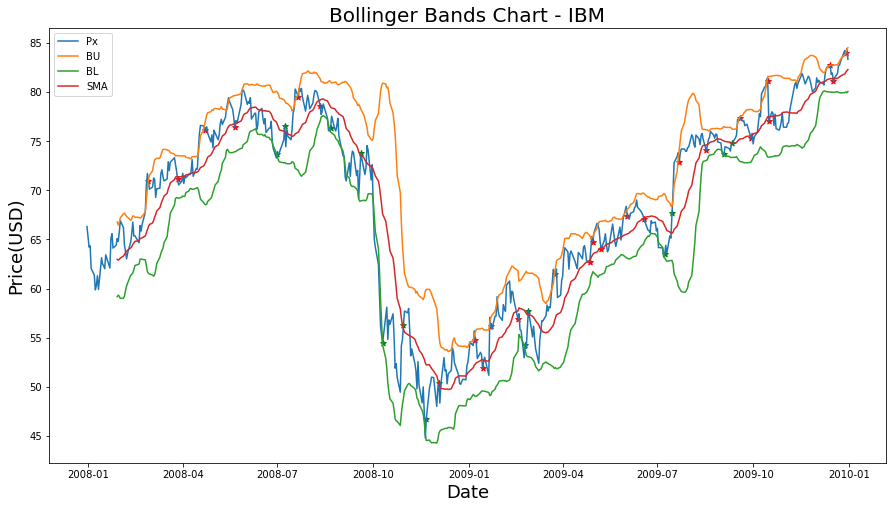

In [16]:
plt.figure(figsize =(15,8))
plt.title('Bollinger Bands Chart - IBM', size =20)
plt.xlabel('Date', size =18)
plt.ylabel('Price(USD)', size =18)
plt.plot(IBM[['Px','BU','BL','SMA']]) 
 
plt.scatter(IBM.iloc[buys].index, IBM.iloc[buys].Px, marker ='*',color='g')
plt.scatter(IBM.iloc[sells].index, IBM.iloc[sells].Px, marker ='*',color='r')
plt.legend(['Px','BU','BL','SMA']);

In [17]:
IBM['pos_s'].replace(to_replace=[None], value=0, inplace=True)
IBM['pos_b'].replace(to_replace=[None], value=0, inplace=True)

In [18]:
# net position change
IBM['pos_chg'] = IBM['pos_s'] + IBM ['pos_b']

In [19]:
IBM['total_pos'] = IBM['pos_chg'].cumsum()

In [20]:
# Mark all buy and sells
IBM['trades'] = None
for i in range(len(IBM['Px'])):
    if IBM['pos_chg'][i] == -1:
        IBM['trades'][i] = 'Sell'
    elif IBM['pos_chg'][i] == 1:
        IBM['trades'][i] = 'Buy'

<ipython-input-20-3ff0b27a0743>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['trades'][i] = 'Sell'
<ipython-input-20-3ff0b27a0743>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['trades'][i] = 'Buy'


In [21]:
buys_output = IBM.iloc[buys]['trades']
buys_output.to_csv('buys.csv')

In [22]:
sells_output = IBM.iloc[sells]['trades']
sells_output.to_csv('sells.csv')

In [23]:
# Calculate Portfolio Value
IBM['cash_chg'] = None
for i in range(len(IBM['Px'])):
    if IBM['pos_chg'][i] == 1:
        IBM['cash_chg'][i] = -100*IBM['Px'][i]
    elif IBM['pos_chg'][i] == -1:
        IBM['cash_chg'][i] = 100*IBM['Px'][i]
    else:
        IBM['cash_chg'][i] = 0

<ipython-input-23-7c6f21b8812c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['cash_chg'][i] = 0
<ipython-input-23-7c6f21b8812c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['cash_chg'][i] = 100*IBM['Px'][i]
<ipython-input-23-7c6f21b8812c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM['cash_chg'][i] = -100*IBM['Px'][i]


In [24]:
IBM['cash_bal'] = IBM['cash_chg'].cumsum() + 100000

In [25]:
IBM['cur_nav']= IBM['cash_bal'] + 100*IBM['total_pos'] * IBM['Px']

In [26]:
IBM['daily_return'] = IBM['cur_nav'].pct_change()

In [27]:
IBM['cum_return'] = (1+ IBM['daily_return']).cumprod()

In [28]:
IBM['nom_nav'] = IBM['cur_nav']/IBM['cur_nav'][0]*100

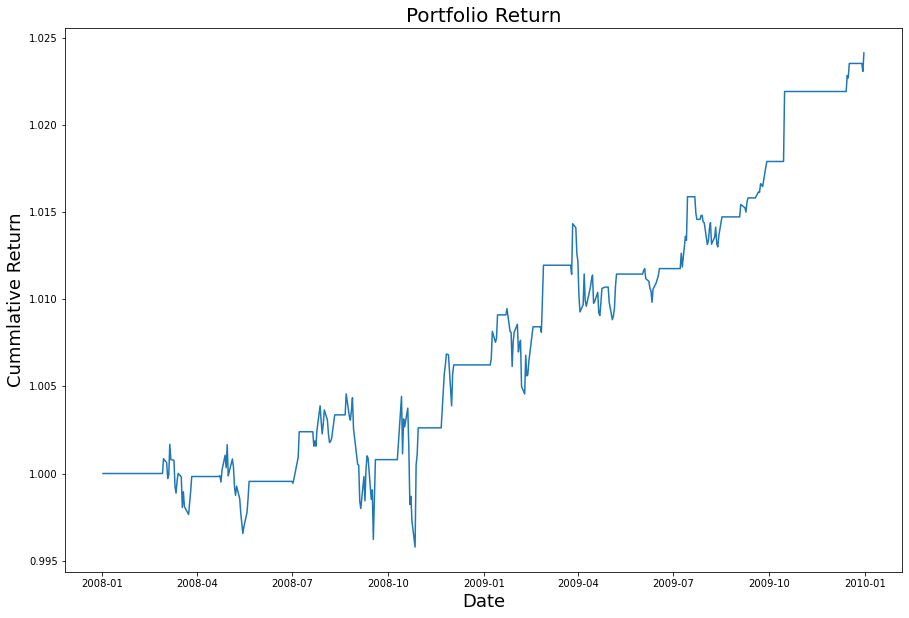

In [29]:
# Plot portfolio Return
plt.figure(figsize =(15,10))
plt.title('Portfolio Return', size =20)
plt.xlabel('Date', size =18)
plt.ylabel('Cummlative Return', size =18)
plt.plot(IBM.cum_return);

In [30]:
# Calculate benchmark return

In [31]:
SPY = wb.DataReader('SPY',data_source='yahoo', start='2007-12-31', end='2009-12-31') # historical stock price fetching

In [32]:
SPY.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,147.610001,146.059998,147.100006,146.210007,108126800.0,110.337723


In [33]:
SPY['daily_return'] = SPY['Adj Close'].pct_change()
SPY['cum_return'] = (1+ SPY['daily_return']).cumprod()
SPY['nom_px'] = SPY['Adj Close']/SPY['Adj Close'][0]*100

In [34]:
# Plot return comparison

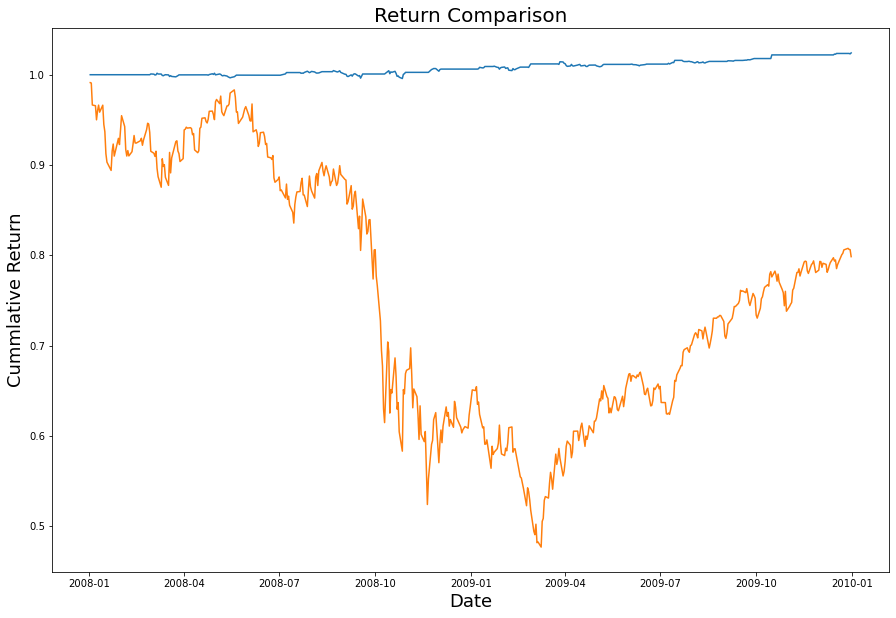

In [35]:
plt.figure(figsize =(15,10))
plt.title('Return Comparison', size =20)
plt.xlabel('Date', size =18)
plt.ylabel('Cummlative Return', size =18)
plt.plot(IBM.cum_return) 
plt.plot(SPY.cum_return);

In [36]:
# print cummulative return
port_return = IBM['cum_return'][-1]-1
spy_return = SPY['cum_return'][-1]-1
print(port_return)
print(spy_return)

0.02415065383911119
-0.20139396630633843
